## load functions

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

def run_kmeans(X, cluster_num, init='random', n_init=10, max_iter=300,tol=1e-4,random_state=1234):
    km = KMeans(
            n_clusters=cluster_num, init=init,
            n_init=n_init, max_iter=max_iter, 
            tol=tol, random_state=random_state
        )
    y_km = km.fit_predict(X)
    return km, y_km

def search_k_means_cluster(X, min_num, max_num):
    distortions = []
    for i in range(min_num,max_num):
        km, y_km = run_kmeans(X, i)
        distortions.append(km.inertia_)
    return distortions

def plot_elbow(min_num, max_num, distortions):
    """
    choose the number of clusters by the elblow plot
    """
    plt.plot(range(min_num, max_num), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

def vis_tsne(X,y_km):
    """
    visualize final clusters
    """
    X_embedded = TSNE(n_components=2).fit_transform(X)
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_km, legend='full', palette="Set1")
    plt.show()

## Select a range of clusters and plot elblow

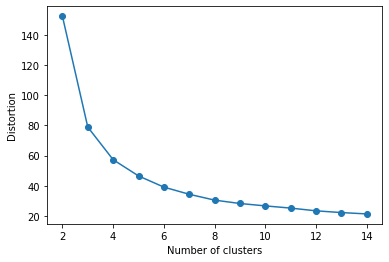

In [19]:
min_num, max_num = 2,15
# load the PCA files
X = load_iris().data
# test
distortions=search_k_means_cluster(X, min_num, max_num)
plot_elbow(min_num, max_num, distortions)

## Visualize clusters based on the optimal number

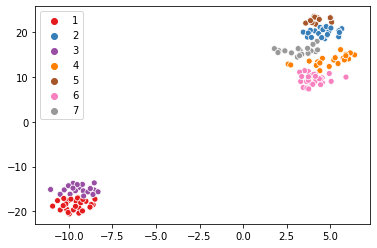

In [20]:
optimal_num = 7
_, y_km = run_kmeans(X, optimal_num)
# convert to 1-indexed
y_km = y_km + 1
vis_tsne(X, y_km) 

In [17]:
print(y_km)
np.save("kmeans_membership.npy", y_km)

[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 3 4 4 4 6 4 6 4 6 4 6 6 4 6 4 6 4 6 6 4 6 7 6 7 4
 4 4 4 4 4 6 6 6 6 7 6 4 4 4 6 6 6 4 6 6 6 6 6 4 6 6 2 7 5 2 2 5 6 5 2 5 2
 7 2 7 7 2 2 5 5 7 2 7 5 7 2 5 7 7 2 5 5 5 2 7 7 5 2 2 7 2 2 2 7 2 2 2 7 2
 2 7]
